## PROBLEM STATEMENT
To build a classification methodology to determine whether a customer is placing a fraudulent insurance claim.

## DATA DESCRIPTION

### FEATURES
1. months_as_customer: It denotes the number of months for which the customer is associated with the insurance company.
2. age: continuous. It denotes the age of the person.
3. policy_number: The policy number.
4. policy_bind_date: Start date of the policy.
5. policy_state: The state where the policy is registered.
6. policy_csl-combined single limits. How much of the bodily injury will be covered from the total damage.
7. policy_deductable: The amount paid out of pocket by the policy-holder before an insurance provider will pay any expenses.
8. policy_annual_premium: The yearly premium for the policy.
9. umbrella_limit: An umbrella insurance policy is extra liability insurance coverage that goes beyond the limits of the insured's homeowners, auto or watercraft insurance. It provides an additional layer of security to those who are at risk of being sued for damages to other people's property or injuries caused to others in an accident.
10. insured_zip: The zip code where the policy is registered.
11. insured_sex: It denotes the person's gender.
12. insured_education_level: The highest educational qualification of the policy-holder.
13. insured_occupation: The occupation of the policy-holder.
14. insured_hobbies: The hobbies of the policy-holder.
15. insured_relationship: Dependents on the policy-holder.
16. capital-gain: It denotes the monitory gains by the person.
17. capital-loss: It denotes the monitory loss by the person.
18. incident_date: The date when the incident happened.
19. incident_type: The type of the incident.
20. collision_type: The type of collision that took place.
21. incident_severity: The severity of the incident.
22. authorities_contacted: Which authority was contacted.
23. incident_state: The state in which the incident took place.
24. incident_city: The city in which the incident took place. 
25. incident_location: The street in which the incident took place.
26. incident_hour_of_the_day: The time of the day when the incident took place.
27. property_damage: If any property damage was done.
28. bodily_injuries: Number of bodily injuries.
29. Witnesses: Number of witnesses present.
30. police_report_available: Is the police report available.
31. total_claim_amount: Total amount claimed by the customer.
32. injury_claim: Amount claimed for injury
33. property_claim: Amount claimed for property damage.
34. vehicle_claim: Amount claimed for vehicle damage.
35. auto_make: The manufacturer of the vehicle
36. auto_model: The model of the vehicle. 
37. auto_year: The year of manufacture of the vehicle.

### TARGET LABEL
38. fraud_reported: If fraud was reported or not (Y or N)

### Step 1: Read and understand the data

In [2]:
#Required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns',1000)

In [3]:
# reading the data
data=pd.read_csv('data/insuranceFraud.csv')

In [4]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In the dataset, missing values are indicated by '?'. We'll replace it with 'nan'

In [5]:
data = data.replace('?',np.nan)

In [6]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,1/25/2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,1/21/2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2/22/2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,1/10/2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2/17/2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


From the data description it can be inferred that there are variables which may not required for analysis-
* policy_number, policy_bind_date, insured_zip, policy_state
* incident_location, incident_date, incident_state, incident_city
* insured_hobbies, auto_make, auto_model, auto_year

**We will drop the above features from our analysis**

In [7]:
cols_to_drop = ['policy_number', 'policy_bind_date', 'insured_zip', 'policy_state', 'incident_location', 'incident_date', 'incident_state', 'incident_city','insured_hobbies', 'auto_make', 'auto_model', 'auto_year']

In [8]:
#Storing a copy of original data before dropping
data_original = data.copy()

In [9]:
data.drop(columns=cols_to_drop, inplace=True)

In [10]:
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,5,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,NaN,Minor Damage,Police,8,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,7,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,5,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,NaN,Minor Damage,None,20,1,NO,0,1,NO,6500,1300,650,4550,N


In [11]:
print('Shape of data {}'.format(data.shape))

Shape of data (1000, 27)


Checking for null values

In [12]:
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

collision_type, property_damage and police_report_available have missing data. We will fill them with the mode value of the respective features

In [17]:
print('Mode for collision_type: {}'.format(data['collision_type'].mode()))
print('Mode for property_damage: {}'.format(data['property_damage'].mode()))
print('Mode for police_report_available: {}'.format(data['police_report_available'].mode()))

Mode for collision_type: 0    Rear Collision
dtype: object
Mode for property_damage: 0    NO
dtype: object
Mode for police_report_available: 0    NO
dtype: object


In [20]:
#Imputing missing values in collision_type, property_damage and police_report_available with the most frequent values of each category
data['collision_type'] = data['collision_type'].fillna(data['collision_type'].mode())
data['property_damage'] = data['property_damage'].fillna(data['property_damage'].mode())
data['police_report_available'] = data['police_report_available'].fillna(data['police_report_available'].mode())

In [21]:
data.fillna(data.mode().iloc[0], inplace=True)

In [22]:
data.isna().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

**Selecting categorical variables**

In [23]:
categorical_df = data.select_dtypes(include=['object'])

In [24]:
categorical_df.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [25]:
#Unique values for categorical variables

for c in categorical_df.columns:
    print('Unique values for {}: {}'.format(c, data[c].unique()))
    print('Unique values count for {}: {}'.format(c, len(data[c].unique())))
    print(100*'*')

Unique values for policy_csl: ['250/500' '100/300' '500/1000']
Unique values count for policy_csl: 3
****************************************************************************************************
Unique values for insured_sex: ['MALE' 'FEMALE']
Unique values count for insured_sex: 2
****************************************************************************************************
Unique values for insured_education_level: ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
Unique values count for insured_education_level: 7
****************************************************************************************************
Unique values for insured_occupation: ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
Unique values count for insured_occupation: 14
****************************

Some categorical variables have 2 or 3 values. Mapping them to corresponding integer values.

In [26]:
categorical_df['policy_csl'] = categorical_df['policy_csl'].map({'100/300':1,'250/500':3,'500/1000':5})
categorical_df['insured_sex'] = categorical_df['insured_sex'].map({'FEMALE':0,'MALE':1})
categorical_df['insured_education_level'] = categorical_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
categorical_df['incident_severity'] = categorical_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
categorical_df['property_damage'] = categorical_df['property_damage'].map({'NO' : 0, 'YES' : 1})
categorical_df['police_report_available'] = categorical_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
categorical_df['fraud_reported'] = categorical_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

<ipython-input-26-3e77fbcd5b9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['policy_csl'] = categorical_df['policy_csl'].map({'100/300':1,'250/500':3,'500/1000':5})
<ipython-input-26-3e77fbcd5b9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['insured_sex'] = categorical_df['insured_sex'].map({'FEMALE':0,'MALE':1})
<ipython-input-26-3e77fbcd5b9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

Encoding the remaining categorical variables

In [27]:
#Encoding the remaining variables
for col in categorical_df.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    categorical_df= pd.get_dummies(categorical_df, columns=[col], prefix = [col], drop_first=True)

In [28]:
categorical_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,3,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,3,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,1,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,3,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


**Selecting numerical variables**

In [29]:
numerical_df = data.select_dtypes(include=['int64', 'float64'])
numerical_df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [30]:
#Concatenating categorical and numerical data

final_df = pd.concat([categorical_df,numerical_df], axis=1)

In [31]:
final_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,3,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,3,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510
2,1,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,3,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,5,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [32]:
X = final_df.drop('fraud_reported', axis=1)
y = final_df['fraud_reported']

In [33]:
import matplotlib.pyplot as plt
%matplotlib  inline

### DATA DISTRIBUTION

* **policy_csl**

(array([349.,   0.,   0.,   0.,   0., 351.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

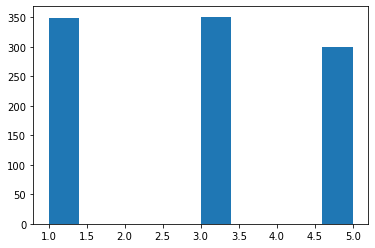

In [34]:
plt.hist(final_df['policy_csl'])

* The distribution of data is almost same across classes

* **insured_sex**

/home/surbhit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insured_sex', ylabel='Density'>

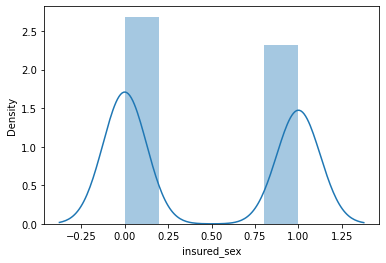

In [35]:
sns.distplot(final_df['insured_sex'])

* insured_sex - male and female have a similar distribution

* **insured_education_level**

/home/surbhit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='insured_education_level', ylabel='Density'>

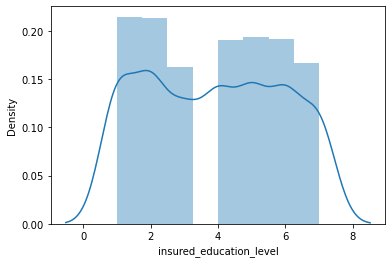

In [36]:
sns.distplot(final_df['insured_education_level'])

* The education level (1-7) is almost uniformly distributed

* **incident_severity**

/home/surbhit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='incident_severity', ylabel='Density'>

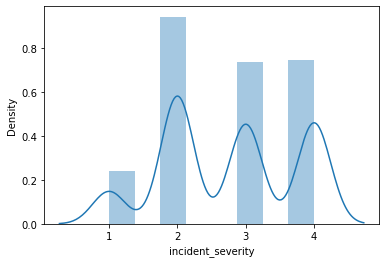

In [37]:
sns.distplot(final_df['incident_severity'])

* Trivial Damage(1) has the least number of claims
* Major Damage and Total Loss have almost equal claims
* Minor Damage has the most number of claims

* **property_damage**

/home/surbhit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='property_damage', ylabel='Density'>

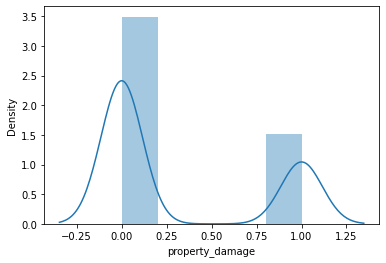

In [38]:
sns.distplot(final_df['property_damage'])

* Incidents with no property damage(0) is double the incidents with property damage(1)

* **police_report_available**

/home/surbhit/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='police_report_available', ylabel='Density'>

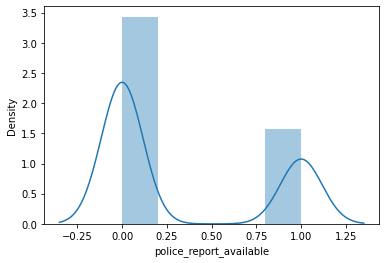

In [39]:
sns.distplot(final_df['police_report_available'])

* Most of the incidents don't have a police report available

In [40]:
numerical_df.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

* **months_as_customer ~ age**

/home/surbhit/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='months_as_customer', ylabel='age'>

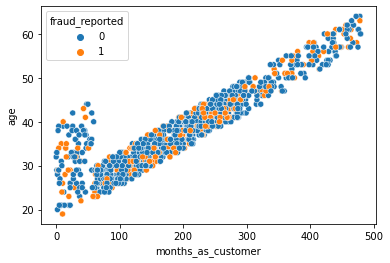

In [41]:
sns.scatterplot(final_df['months_as_customer'],final_df['age'], hue=final_df['fraud_reported'] )

* **Average age of customers for cases where fraud has and has not been reported**

In [42]:
fraud_age = final_df.groupby('fraud_reported')['age']

In [43]:
fraud_age.mean()

fraud_reported
0    38.884462
1    39.141700
Name: age, dtype: float64

* The average age for fraud reported and not reported cases are almost the same

* **Average months as customers for cases where fraud has and has not been reported**

In [44]:
fraud_mths = final_df.groupby('fraud_reported')['months_as_customer']

In [45]:
fraud_mths.mean()

fraud_reported
0    202.600266
1    208.080972
Name: months_as_customer, dtype: float64

* Customers reported as fraud cases and not fraud cases have very less difference in months as customer 

**CORELATION**

<AxesSubplot:>

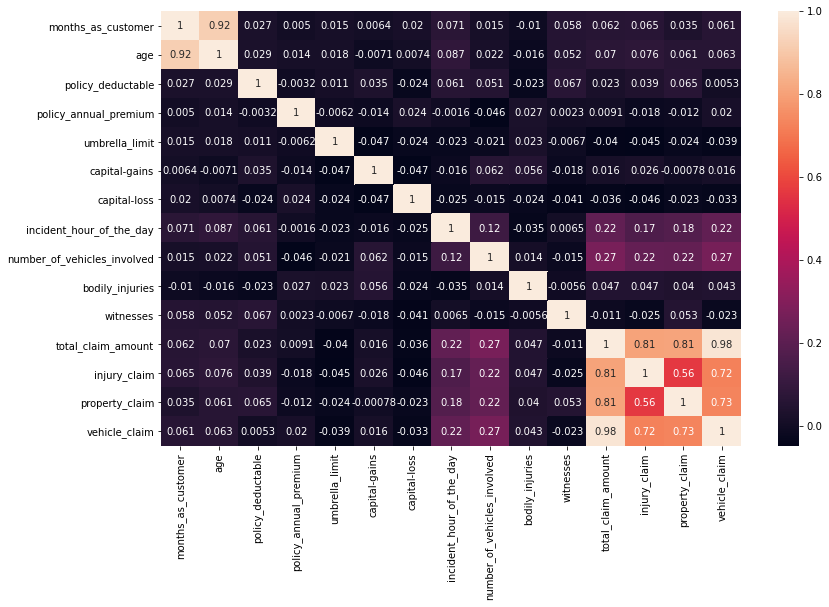

In [46]:
plt.figure(figsize=(13,8))
sns.heatmap(numerical_df.corr(), annot=True)

**INFERENCE**
* High correlation between age & months_as_customer
* total_claim_amount has high correlation with injury_claim, property_claim, vehicle_claim

**We'll drop age and total_claim**

In [47]:
X.drop(columns=['age','total_claim_amount'], inplace=True)

### Step 2: Modelling 

In [48]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1,test_size=0.25)

**SCALING VARIABLES**

In [49]:
X_train.describe()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.00000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,2.872000,0.446667,3.928000,2.764000,0.293333,0.313333,0.062667,0.074667,0.076000,0.060000,0.048000,0.092000,0.07200,0.07200,0.090667,0.068000,0.069333,0.089333,0.064000,0.166667,0.182667,0.188000,0.140000,0.150667,0.078667,0.410667,0.097333,0.484000,0.272000,0.221333,0.084000,0.213333,0.288000,202.734667,1125.333333,1254.155067,1.068000e+06,24650.800000,-26385.200000,11.697333,1.829333,0.972000,1.542667,7390.946667,7481.106667,37925.253333
std,1.609266,0.497479,1.985969,0.963436,0.455594,0.464158,0.242524,0.263028,0.265175,0.237645,0.213909,0.289219,0.25866,0.25866,0.287326,0.251914,0.254190,0.285415,0.244916,0.372927,0.386651,0.390973,0.347219,0.357962,0.269397,0.492283,0.296609,0.500077,0.445287,0.415421,0.277573,0.409934,0.453133,114.296503,606.725399,238.666436,2.266471e+06,27946.910248,27771.557756,6.963024,1.016653,0.817378,1.125108,4828.819362,4869.805799,18843.432860
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,484.670000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,70.000000
25%,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,500.000000,1094.470000,0.000000e+00,0.000000,-51175.000000,6.000000,1.000000,0.000000,1.000000,4210.000000,4520.000000,29957.500000
50%,3.000000,0.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200.000000,1000.000000,1255.650000,0.000000e+00,0.000000,-21900.000000,12.000000,1.000000,1.000000,2.000000,6795.000000,6775.000000,42000.000000
75%,5.000000,1.000000,6.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00

Selecting numerical features for scaling

In [50]:
numerical_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim']]

In [51]:
print('Variables for scaling:')
numerical_df.columns

Variables for scaling:


Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [52]:
scaler = StandardScaler()

In [53]:
scaled_data = scaler.fit_transform(numerical_df)
scaled_numerical_df = pd.DataFrame(data=scaled_data, columns=numerical_df.columns, index=X_train.index)

In [54]:
scaled_numerical_df.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [55]:
#Dropping unscaled columns from training set and adding the scaled cols
X_train.drop(columns=scaled_numerical_df.columns, inplace=True)
X_train = pd.concat([scaled_numerical_df,X_train], axis=1)

### MODEL 1

* **SUPPORT VECTOR CLASSIFIER**

In [56]:
svc_model1 = SVC()

In [57]:
svc_model1 = svc_model1.fit(X_train,y_train)

In [58]:
y_test_Pred_model1 = svc_model1.predict(X_test)

/home/surbhit/anaconda3/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [59]:
acc_model1 = accuracy_score(y_test, y_test_Pred_model1)

In [60]:
acc_model1

0.72

In [61]:
X_test

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim
507,1,1,2,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,86,2000,1409.06,0,74200,-68100,0,1,2,2,9680,14520,38720
818,3,1,3,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,286,1000,999.43,0,25800,0,3,1,2,0,820,410,2870
452,5,0,3,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,101,1000,1313.64,0,12100,0,3,1,1,0,780,390,3120
368,3,0,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,10,1000,1185.78,0,0,-60700,5,1,0,2,4450,8900,35600
242,5,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,190,2000,965.21,0,36900,-53700,10,1,2,1,630,630,5040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,5,1,2,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,115,500,1757.21,0,46400,0,12,3,1,0,5460,5460,38220
890,1,0,1,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,145,1000,1142.48,0,0,0,18,1,2,0,9500,4750,38000
439,3,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,61,1000,1115.27,0,0,-66000,10,1,2,1,590,590,4720
135,3,0,3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,171,2000,1277.25,0,84900,0,14,1,1,2,13840,6920,48440


### MODEL 2

* **2. XGBoost**

In [62]:
xgb_model2 = XGBClassifier()

In [63]:
xgb_model2 = xgb_model2.fit(X_train, y_train)

In [64]:
numerical_test_df = X_test[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim']]

In [65]:
scaled_data_test = scaler.transform(numerical_test_df)
scaled_numerical_test_df = pd.DataFrame(data=scaled_data_test, columns=numerical_test_df.columns, index=X_test.index)

In [66]:
#Dropping unscaled columns from training set and adding the scaled cols
X_test.drop(columns=scaled_numerical_test_df.columns, inplace=True)
X_test = pd.concat([scaled_numerical_test_df,X_test], axis=1)

In [67]:
y_test_Pred_model2 = xgb_model2.predict(X_test)

In [68]:
accuracy_score(y_test, y_test_Pred_model2)

0.744

In [69]:
xbg_grid = XGBClassifier()

Using Grid Search for tuning parameters

In [73]:
param_grid = {"n_estimators": [10, 50, 100, 130],"max_depth": range(2, 10, 1)}


grid = GridSearchCV(estimator=xbg_grid, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [74]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(2, 10),
                         'n_estimators': [10, 50, 100, 130]},
             verbose=3)

In [75]:
print('Best parameters: {}'.format(grid.best_params_))

Best parameters: {'max_depth': 2, 'n_estimators': 10}


Building model using the best parameters

In [76]:
xgb_model3 = XGBClassifier(max_depth=2, n_estimators=10)

In [77]:
xgb_model3.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [78]:
y_test_Pred_model3 = xgb_model3.predict(X_test)

In [79]:
accuracy_score(y_test, y_test_Pred_model3)

0.78

### MODEL 3

* **RANDOM FOREST CLASSIFIER**

In [80]:
rf_model4 = RandomForestClassifier()

In [81]:
rf_model4 = rf_model4.fit(X_train,y_train)

In [82]:
y_test_Pred_model4 = rf_model4.predict(X_test)

In [83]:
accuracy_score(y_test,y_test_Pred_model4)

0.724

In [84]:
n_estimators = [100,300,500,800,1000,1500]
max_features = ['auto', 'sqrt']
max_depth = [2,3,4,5,6]
max_depth.append(None)
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [85]:
rf_grid = RandomForestClassifier()

Using grid search to find best parameters for random forest

In [86]:
grid = GridSearchCV(estimator=rf_grid, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [87]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


/home/surbhit/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 300, 500, 800, 1000, 1500]},
             verbose=3)

In [89]:
print('Best parameters {} ' .format(grid.best_params_))

Best parameters {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100} 


Fitting random forest with best parameters

In [91]:
rf_model5 = RandomForestClassifier(bootstrap=False,
 max_depth= None,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 3,
 n_estimators= 300)

rf_model5.fit(X_train,y_train)

/home/surbhit/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_features='auto',
                       min_samples_split=3, n_estimators=300)

In [92]:
y_test_Pred_model5 = rf_model5.predict(X_test)

In [93]:
accuracy_score(y_test_Pred_model5,y_test)

0.728

**MODEL 2: In this case, XGBoost classifier gives the best accuracy**